In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# if you want more information about the dataset for this demo:

# scikit-learn dataset
# https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

# in short, regression problem, trying to predict disease progression based on
# a bunch of variables

# load dataset
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)
X = pd.DataFrame(diabetes_X)
y = diabetes_y

X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [3]:
# random forests
rf_model = RandomForestRegressor(
    n_estimators=100, max_depth=3, random_state=0, n_jobs=4)

# hyperparameter space
rf_param_grid = dict(
    n_estimators=[2, 5, 10, 20, 50, 100, 200, 300],
#     max_depth=[1, 2, 3, 4],
#     min_samples_split=[2,4,8,12,24]
)

# search
reg = GridSearchCV(rf_model, rf_param_grid,
                   scoring='r2', cv=5)

search = reg.fit(X, y)

# best hyperparameters
search.best_params_

{'n_estimators': 200}

Text(0.5, 0, 'Number of trees')

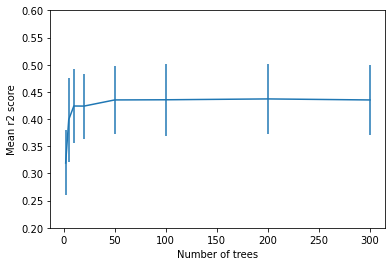

In [4]:
# plot the resuls

results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
results.index = rf_param_grid['n_estimators']

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylim(0.2, 0.6)
plt.ylabel('Mean r2 score')
plt.xlabel('Number of trees')

In [5]:
# random forests
rf_model = RandomForestRegressor(
    n_estimators=200, max_depth=3, random_state=0, n_jobs=4)

# hyperparameter space
rf_param_grid = dict(
#     n_estimators=[2, 5, 10, 20, 50, 100, 200],
    max_depth=[1, 2, 3, 4, 5, 6],
#     min_samples_split=[2,4,8,12,24]
)

# search
reg = GridSearchCV(rf_model, rf_param_grid,
                   scoring='r2', cv=5)

search = reg.fit(X, y)

# best hyperparameters
search.best_params_

{'max_depth': 3}

Text(0.5, 0, 'Tree depth')

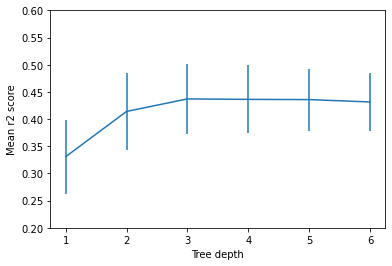

In [6]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
results.index = rf_param_grid['max_depth']

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylim(0.2, 0.6)
plt.ylabel('Mean r2 score')
plt.xlabel('Tree depth')

In [7]:
# random forests
rf_model = RandomForestRegressor(
    n_estimators=200, max_depth=3, random_state=0, n_jobs=4)

# hyperparameter space
rf_param_grid = dict(
#     n_estimators=[2, 5, 10, 20, 50, 100, 200],
#     max_depth=[1, 2, 3, 4, 5, 6],
    min_samples_split=[2,4,8,12,24,48]
)

# search
reg = GridSearchCV(rf_model, rf_param_grid,
                   scoring='r2', cv=5)

search = reg.fit(X, y)

# best hyperparameters
search.best_params_

{'min_samples_split': 12}

Text(0.5, 0, 'Minimum samples at split')

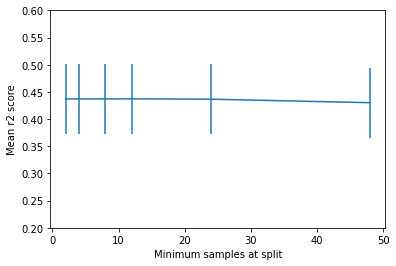

In [8]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
results.index = rf_param_grid['min_samples_split']

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylim(0.2, 0.6)
plt.ylabel('Mean r2 score')
plt.xlabel('Minimum samples at split')